In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ishandutta/early-stage-diabetes-risk-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset/versions/1


In [11]:
ls /root/.cache/kagglehub/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset/versions/1/diabetes_data_upload.csv

/root/.cache/kagglehub/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset/versions/1/diabetes_data_upload.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import norm

In [13]:
path = '/root/.cache/kagglehub/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset/versions/1/diabetes_data_upload.csv'
df = pd.read_csv(path)

In [17]:
df.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True


In [15]:
df = pd.get_dummies(df, drop_first=True)

In [18]:
X = df.drop(columns=['class_Positive'])
y = df['class_Positive']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [21]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    type1_error = cm[0][1] / sum(cm[0])  # False Positive Rate
    type2_error = cm[1][0] / sum(cm[1])  # False Negative Rate
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Type I Error (False Positives)": type1_error,
        "Type II Error (False Negatives)": type2_error
    }


                     Accuracy  Precision    Recall  F1 Score  \
Logistic Regression  0.942308   0.983333  0.921875  0.951613   
Decision Tree        0.990385   1.000000  0.984375  0.992126   
Random Forest        0.990385   0.984615  1.000000  0.992248   
SVM                  0.980769   0.984375  0.984375  0.984375   
KNN                  0.932692   0.983051  0.906250  0.943089   
Gradient Boosting    0.990385   1.000000  0.984375  0.992126   

                     Type I Error (False Positives)  \
Logistic Regression                           0.025   
Decision Tree                                 0.000   
Random Forest                                 0.025   
SVM                                           0.025   
KNN                                           0.025   
Gradient Boosting                             0.000   

                     Type II Error (False Negatives)  
Logistic Regression                         0.078125  
Decision Tree                               0.015625  


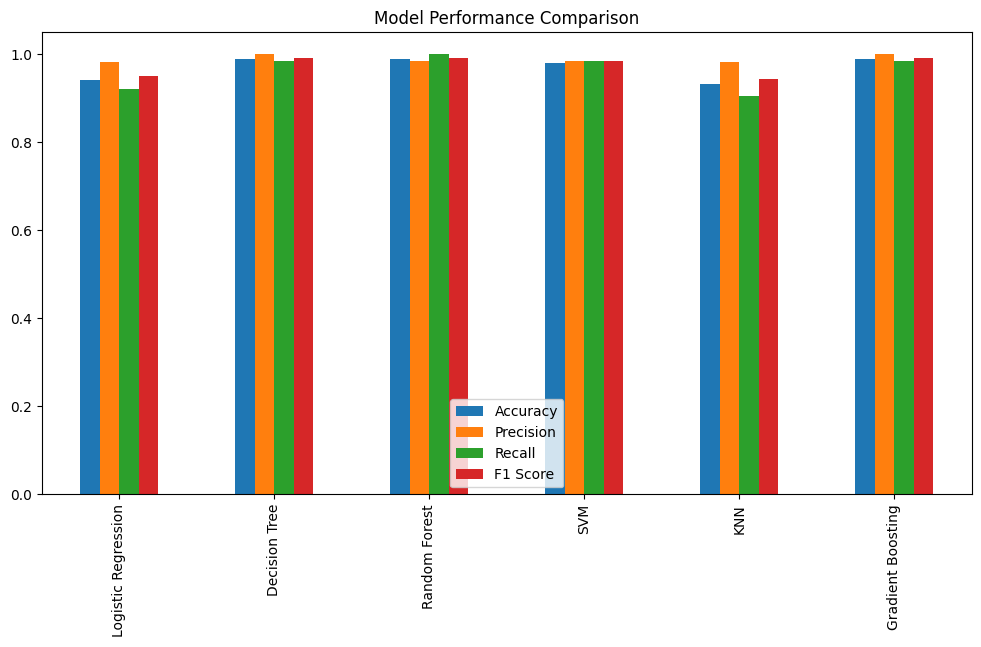

In [22]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Plot comparison
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.show()

In [25]:
# Get age column (adjust if different column name)
age_column = "Age"  # Update with actual age column name

# Get correctly and misclassified diabetic patients
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# Reset index of y_test to match df before comparison
y_test_reset = y_test.reset_index(drop=True)

correctly_classified = df.loc[y_test_reset.index[y_test_reset == y_pred], age_column]
misclassified = df.loc[y_test_reset.index[y_test_reset != y_pred], age_column]

# Perform Z-Test
mean_correct = np.mean(correctly_classified)
std_correct = np.std(correctly_classified, ddof=1)
n_correct = len(correctly_classified)

mean_misclassified = np.mean(misclassified)
std_misclassified = np.std(misclassified, ddof=1)
n_misclassified = len(misclassified)

# Standard error
se = np.sqrt((std_correct**2 / n_correct) + (std_misclassified**2 / n_misclassified))

# Z-score
z_score = (mean_correct - mean_misclassified) / se
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Significant difference in mean age between correct and misclassified cases.")
else:
    print("No significant difference in mean age.")

Z-Score: 0.22440308648418342
P-Value: 0.8224436692609505
No significant difference in mean age.


In [26]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate False Positive Rate
fp_rate_rf = cm_rf[0][1] / sum(cm_rf[0])

# Perform one-sample Z-Test against 20%
pop_mean = 0.20  # Given threshold
n = len(y_test)
std = np.sqrt((pop_mean * (1 - pop_mean)) / n)
z_score = (fp_rate_rf - pop_mean) / std
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f"False Positive Rate (Random Forest): {fp_rate_rf}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Significant difference from 20%. Consider tuning the model.")
else:
    print("Not significantly different from 20%.")

False Positive Rate (Random Forest): 0.025
Z-Score: -4.461642074393687
P-Value: 8.133399450827028e-06
Significant difference from 20%. Consider tuning the model.


In [27]:
false_negatives = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    false_negatives[name] = cm[1][0] / sum(cm[1])

# Perform Z-Test between two models with different Type II errors
model1 = "SVM"
model2 = "KNN"

mean1 = false_negatives[model1]
mean2 = false_negatives[model2]
n1 = len(y_test)
n2 = len(y_test)

se = np.sqrt((mean1 * (1 - mean1)) / n1 + (mean2 * (1 - mean2)) / n2)
z_score = (mean1 - mean2) / se
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print(f"Significant difference in Type II error between {model1} and {model2}.")
else:
    print(f"No significant difference in Type II error.")

Z-Score: -2.5151608424234704
P-Value: 0.011897809031118811
Significant difference in Type II error between SVM and KNN.


In [28]:
best_model = results_df.sort_values(by=["Type II Error (False Negatives)"]).index[0]
print(f"Recommended model for deployment: {best_model}")

Recommended model for deployment: Random Forest
